<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Признаки" data-toc-modified-id="Признаки-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Признаки</a></span></li><li><span><a href="#Целовой-признак" data-toc-modified-id="Целовой-признак-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Целовой признак</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Посчитаем-F1-меру--и-ROC_AUC-для-3-моделей-и-подберем-к-ним-наилучшие-гиперпараметры" data-toc-modified-id="Посчитаем-F1-меру--и-ROC_AUC-для-3-моделей-и-подберем-к-ним-наилучшие-гиперпараметры-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Посчитаем F1 меру  и ROC_AUC для 3 моделей и подберем к ним наилучшие гиперпараметры</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вначале-пойдем-по-пути-взвешивания-классов-и-применим-этот-метод-к-нашим-моделям" data-toc-modified-id="Вначале-пойдем-по-пути-взвешивания-классов-и-применим-этот-метод-к-нашим-моделям-3.0.0.1"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span>Вначале пойдем по пути взвешивания классов и применим этот метод к нашим моделям</a></span></li><li><span><a href="#Попробуем-увеличить-выборки,-так-как-соотношение-классов-приблизительно-1-к-4,-применить-параметр-repeat=4" data-toc-modified-id="Попробуем-увеличить-выборки,-так-как-соотношение-классов-приблизительно-1-к-4,-применить-параметр-repeat=4-3.0.0.2"><span class="toc-item-num">3.0.0.2&nbsp;&nbsp;</span>Попробуем увеличить выборки, так как соотношение классов приблизительно 1 к 4, применить параметр repeat=4</a></span></li><li><span><a href="#Попробуем-уменьшить-выборки,-а-fraction-возьмем-равным-0.25" data-toc-modified-id="Попробуем-уменьшить-выборки,-а-fraction-возьмем-равным-0.25-3.0.0.3"><span class="toc-item-num">3.0.0.3&nbsp;&nbsp;</span>Попробуем уменьшить выборки, а fraction возьмем равным 0.25</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Признаки
<br>

RowNumber — индекс строки в данных
<br>
CustomerId — уникальный идентификатор клиента
<br>
Surname — фамилия
<br>
CreditScore — кредитный рейтинг
<br>
Geography — страна проживания
<br>
Gender — пол
<br>
Age — возраст
<br>
Tenure — сколько лет человек является клиентом банка
<br>
Balance — баланс на счёте
<br>
NumOfProducts — количество продуктов банка, используемых клиентом
<br>
HasCrCard — наличие кредитной карты
<br>
IsActiveMember — активность клиента
<br>
EstimatedSalary — предполагаемая зарплата
<br>
### Целовой признак
<br>
Exited — факт ухода клиент

## Подготовка данных

In [127]:
#Загрузим необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt






In [128]:
#Загрузим датафрейм
try:
    data=pd.read_csv('C:/Users/ARTEM/Desktop/Project_DS/Churn_Modelling.csv')
except:
    data=pd.read_csv('/datasets/Churn.csv')
    

</div>
<div class="alert alert-block alert-warning">
    <b>Изменения:</b> Попробовал так. Я еще пытался загрузить через кагл, через opendatasets, но у меня почему то выедатся ошибка, хотя делаю как в ролике у индуса. Получил пароль, юзера апи, а вот фаил почему то не находит 'Ошибка-oserror-winerror-123', стаковерфлоу тоже нп помог, я так понимаю фаил не находит
</div>

In [129]:
#Взглянем на первые 5 строк
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [130]:
#Пропусков не видно
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [131]:
#Посмотрим на данные под этим углом
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [132]:
#Проверим дубликаты
data.duplicated().sum()

0

In [133]:
#Проверим столбец на уникальность
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [134]:
#Проверим столбец на уникальность
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# Вывод:
- Посмотрели на данные под разными срезами
- Проверили пропуски, не выявлено
- Проверили дубликаты, не выявлено
- Проверили столбец "Geography","Gender" на уникальность

## Исследование задачи

In [135]:
#Удалим столбцы, которые не представляют ценности для нашей задачи
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

In [136]:
#Проверим удалились ли столбцы
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [137]:
#Преобразуем категориальные признаки в численные техникой прямого кодирования OHE. Избежим дамми-ловушку, используя аргумент drop_first=True
data=pd.get_dummies(data,drop_first=True)

In [138]:
#Проверим результат
data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [139]:
#Разделим выборки на обущающую, тестовую и валидационную в соотношении 3:1:1
features = data.drop(['Exited'], axis=1)
target = data['Exited']

features_train, features_v_t, target_train, target_v_t = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_v_t, target_v_t, test_size=0.5, random_state=12345)

In [140]:
print('Обучающая выборка',features_train.shape)
print('Тестовая выборка',features_test.shape)
print('Валидационная выборка',features_valid.shape)

Обучающая выборка (6000, 11)
Тестовая выборка (2000, 11)
Валидационная выборка (2000, 11)


In [141]:
#Приведем количественные признаки к одному масштабу методом стандартизации данных. Выделим признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [142]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [143]:
#Для обучающей выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.027273,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.027273,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.707790,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.333248,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.054802,1.140475,-0.891560,0,0,1.524268,1,0,0


In [144]:
#Для тестовой выборки
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.054802,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.374285,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.013765,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.721298,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.721298,0.615625,-0.891560,0,1,-1.070919,0,0,1


In [145]:
#Для валидационной выборке
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.054802,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.707790,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.748828,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.721298,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.721298,-1.233163,0.830152,1,0,1.358533,0,1,1


#### Посчитаем F1 меру  и ROC_AUC для 3 моделей и подберем к ним наилучшие гиперпараметры

In [146]:
# Начнем с решающего дерева
best_model_dc = None
best_result_dc = 0
max_depth_list=[]
f1_score_list=[]
criterion=['gini','entropy']
for el in criterion:
    for i in range(1,11):
        model_dc=DecisionTreeClassifier(random_state=12345,max_depth=i, criterion=el)
        max_depth_list.append(i)
        model_dc.fit(features_train, target_train)
        predictions_dc=model_dc.predict(features_valid)
        result_dc=f1_score(target_valid,predictions_dc)
        f1_score_list.append(result_dc)
        if result_dc > best_result_dc:
            k=i
            best_el=el
            best_model_dc = model_dc
            best_result_dc = result_dc 
            
predictions_dc = model_dc.predict(features_valid)

probabilities_valid_dc = model_dc.predict_proba(features_valid)
probabilities_one_valid_dc = probabilities_valid_dc[:, 1]

auc_roc_dc = roc_auc_score(target_valid, probabilities_one_valid_dc)           
 
   
print("F1-score наилучшей модели на валидационной выборке:", best_result_dc, 'c гиперпараметром max_depth',k, 'и гиперпараметром criterion',best_el)
print('ROC_AUC модели',auc_roc_dc)

F1-score наилучшей модели на валидационной выборке: 0.5722543352601155 c гиперпараметром max_depth 9 и гиперпараметром criterion gini
ROC_AUC модели 0.7751256661363788


In [153]:
# Посмотрим на случайный лес, используем метод GridSearchCV для поиска оптимальных гиперпараметров
# Присвоем модель без гиперпараметров,а для самих гиперпараметров подготовим словарь paramers
model_rf= RandomForestClassifier()
parametrs = {'n_estimators': range (1, 15),
              'max_depth': range (1,10),
              'min_samples_leaf': range (1,10),
            'random_state':[12345]}

In [154]:
# используем GridSeachCV для поиска оптимальных параметров
grid = GridSearchCV(model_rf, parametrs, cv=5,scoring='f1')
grid.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': range(1, 15),
                         'random_state': [12345]},
             scoring='f1')

In [155]:
# Выведем наилучшие гиперпараметры
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 3,
 'n_estimators': 12,
 'random_state': 12345}

In [156]:
# Используя лучшие гиперпараметры проверим результат
model_rf= RandomForestClassifier(max_depth=9,random_state=12345,min_samples_leaf=3,n_estimators=12)
model_rf.fit(features_train, target_train)
predictions_rf=model_rf.predict(features_valid)
result_rf = f1_score(target_valid,predictions_rf)

probabilities_valid_rf = model_rf.predict_proba(features_valid)
probabilities_one_valid_rf = probabilities_valid_rf[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid_rf)

In [157]:
print('F1-score наилучшей модели на валидационной выборке',result_rf)
print('ROC_AUC модели',auc_roc)

F1-score наилучшей модели на валидационной выборке 0.5652173913043478
ROC_AUC модели 0.8509510401103322


In [158]:
#Построим модель логической регрессии
solver=['lbfgs', 'liblinear']
best_model_lr = None
best_result_lr = 0
for solv in solver:
        model_lr=LogisticRegression(random_state=12345,max_iter=1000, solver=solv)
        model_lr.fit(features_train, target_train)
        predictions_lr=model_lr.predict(features_valid)
        result_lr = f1_score(target_valid,predictions_lr)
        if result_lr > best_result_lr:
            s=solv
            best_model_lr = model_lr
            best_result_lr = result_lr

probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid_lr)

In [159]:
print('F1-score наилучшей модели на валидационной выборке',best_result_lr, 'с гиперпараметром solver',s)
print('ROC_AUC модели',auc_roc)

F1-score наилучшей модели на валидационной выборке 0.3344594594594595 с гиперпараметром solver lbfgs
ROC_AUC модели 0.7584079869827424


In [160]:
#баланс классов выглядит так:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Вывод:
- Удалены столбцы 'RowNumber','CustomerId', 'Surname', которые не играю роли в данных
- Категориальные признаки 'Gender','Geography' преобразованы в численные
- Количественные данные масштабированы и стандартизированы методом StandardScaler
- Данные разбиты на обучающий, тестовую и валидационную выборки в сотношениее 3:1:1
- Проанализированы 3 модели: дерево решений, случайный лес и логическая регрессия, подобраны оптимальные параметры и выбраны модели с наилучшими параметрами
- Разница в дисбалансе классов почти в 4 раза

## Борьба с дисбалансом

##### Вначале пойдем по пути взвешивания классов и применим этот метод к нашим моделям

In [161]:
# Начнем дерева решений, попробуем class_weight='balanced', т.е. присвоим вес объектам
best_model_dc = None
best_result_dc = 0
max_depth_list=[]
f1_score_list=[]
criterion=['gini','entropy']
for el in criterion:
    for i in range(1,11):
        model_dc=DecisionTreeClassifier(random_state=12345,max_depth=i, criterion=el,class_weight='balanced')
        max_depth_list.append(i)
        model_dc.fit(features_train, target_train)
        predictions_dc=model_dc.predict(features_valid)
        result_dc=f1_score(target_valid,predictions_dc)
        f1_score_list.append(result_dc)
        if result_dc > best_result_dc:
            k=i
            best_el=el
            best_model_dc = model_dc
            best_result_dc = result_dc 
            
probabilities_valid_dc = model_dc.predict_proba(features_valid)
probabilities_one_valid_dc = probabilities_valid_dc[:, 1]   
auc_roc_dc = roc_auc_score(target_valid, probabilities_one_valid_dc)
 
   
print("F1-score наилучшей модели на валидационной выборке:", best_result_dc, 'c гиперпараметром max_depth',k, 'и гиперпараметром criterion',best_el)
print("Roc_auc наилучшей модели",auc_roc_dc)

F1-score наилучшей модели на валидационной выборке: 0.5984930032292788 c гиперпараметром max_depth 5 и гиперпараметром criterion entropy
Roc_auc наилучшей модели 0.7552050883443524


In [162]:
# Далее случайный, лес, применим взвешивание классов
model_rf= RandomForestClassifier(max_depth=9,random_state=12345,min_samples_leaf=3,n_estimators=12,class_weight='balanced')
model_rf.fit(features_train, target_train)
predictions_rf=model_rf.predict(features_valid)
result_rf = f1_score(target_valid,predictions_rf)

probabilities_valid_rf = model_rf.predict_proba(features_valid)
probabilities_one_valid_rf = probabilities_valid_rf[:, 1]   
auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid_rf)

print('F1-score наилучшей модели на валидационной выборке',result_rf)
print('Roc_auc модели',auc_roc_rf)


F1-score наилучшей модели на валидационной выборке 0.6098654708520179
Roc_auc модели 0.8441747470042764


In [163]:
# Далее логическая регрессия, применим взвешивание классов
model_lr=LogisticRegression(random_state=12345,max_iter=1000, solver='lbfgs',class_weight='balanced')
model_lr.fit(features_train, target_train)
predictions_lr=model_lr.predict(features_valid)
result_lr = f1_score(target_valid,predictions_lr)

probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]   
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)

print('F1-score наилучшей модели на валидационной выборке',result_lr)
print('Roc_auc модели',auc_roc_lr)

F1-score наилучшей модели на валидационной выборке 0.48676345004269855
Roc_auc модели 0.7633393620817934


##### Попробуем увеличить выборки, так как соотношение классов приблизительно 1 к 4, применить параметр repeat=4

In [164]:
#Функция для увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)



In [165]:
#Проверим
target_upsampled.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

In [166]:
#Применим в дереву решений
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model_dc = DecisionTreeClassifier(random_state=12345, max_depth=5,criterion='entropy')
model_dc.fit(features_upsampled, target_upsampled)
predicted_valid_dc = model_dc.predict(features_valid) 

probabilities_valid_dc = model_dc.predict_proba(features_valid)
probabilities_one_valid_dc = probabilities_valid_dc[:, 1]   
auc_roc_dc = roc_auc_score(target_valid, probabilities_one_valid_dc)

print("F1-score", f1_score(target_valid, predicted_valid_dc))
print('Roc_auc модели',auc_roc_dc)

F1-score 0.5984930032292788
Roc_auc модели 0.8306108190831059


In [167]:
#Применим к случайному лесу
model_rf = RandomForestClassifier(max_depth=9,random_state=12345,min_samples_leaf=3,n_estimators=12)
model_rf.fit(features_upsampled, target_upsampled)
predicted_valid_rf = model_rf.predict(features_valid)

probabilities_valid_rf = model_rf.predict_proba(features_valid)
probabilities_one_valid_rf = probabilities_valid_rf[:, 1]   
auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid_rf)

print("F1-score", f1_score(target_valid, predicted_valid_rf))
print('Roc_auc модели',auc_roc_rf)

F1-score 0.6061855670103093
Roc_auc модели 0.8420977020185217


In [168]:
#Применим к логической регрессии
model_lr = LogisticRegression(random_state=12345,max_iter=1000, solver='lbfgs')
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid_lr = model_lr.predict(features_valid)


probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]   
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)

print("F1-score", f1_score(target_valid, predicted_valid_lr))
print('Roc_auc модели',auc_roc_lr)

F1-score 0.4850042844901457
Roc_auc модели 0.7632682873716874


##### Попробуем уменьшить выборки, а fraction возьмем равным 0.25

In [169]:
#Сбалансируем классы путем уменьшения выборки, downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)



In [170]:
#Проверим баланс
target_downsampled.value_counts()

0    1201
1    1196
Name: Exited, dtype: int64

In [171]:
#Применим к дереву решений
model_dc = DecisionTreeClassifier(random_state=12345, max_depth=5,criterion='entropy')
model_dc.fit(features_downsampled, target_downsampled)
predicted_valid_dc = model_dc.predict(features_valid) 


probabilities_valid_dc = model_dc.predict_proba(features_valid)
probabilities_one_valid_dc = probabilities_valid_dc[:, 1]   
auc_roc_dc = roc_auc_score(target_valid, probabilities_one_valid_dc)


print("F1-score", f1_score(target_valid, predicted_valid_dc))
print('Roc_auc модели',auc_roc_dc)


F1-score 0.56289592760181
Roc_auc модели 0.8233793453867977


In [173]:
#Применим к случайному лесу
model_rf = RandomForestClassifier(max_depth=9,random_state=12345,min_samples_leaf=3,n_estimators=12)
model_rf.fit(features_downsampled, target_downsampled)
predicted_valid_rf = model_rf.predict(features_valid) 

probabilities_valid_rf = model_rf.predict_proba(features_valid)
probabilities_one_valid_rf = probabilities_valid_rf[:, 1]   
auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid_rf)



print("F1-score", f1_score(target_valid, predicted_valid_rf))
print('Roc_auc модели',auc_roc_rf)


F1-score 0.5796296296296295
Roc_auc модели 0.8409204326181504


In [174]:
#Применим к логической регресии
model_lr = LogisticRegression(random_state=12345,max_iter=1000, solver='lbfgs')
model_lr.fit(features_downsampled, target_downsampled)
predicted_valid_lr = model_lr.predict(features_valid) 

probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]   
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)


print("F1-score", f1_score(target_valid, predicted_valid_lr))
print('Roc_auc модели',auc_roc_lr)

F1-score 0.4800693240901213
Roc_auc модели 0.7616562524573703


# Вывод:
Была произведена попытка повысить значение F1 score с помощью следующий методов балансировки классов:
<br>
- Взвешивание классов
    <br>
- Увеличение выборки
    <br>
- Уменьшиние выборки
    <br>
Для дерева решений наиболее эффективным оказалось взвешивание классов, удалось повысить F1 score с 0,57 до 0,59
<br>
Для случайного леса наиболее эффективным оказалось увеличение выборки, удалось повысить F1 score c 0,48 до 0,59
<br>
Для логической регрессит наиболее эффективным оказалось уменьшение выборки, удалось повысить F1 score c 0,33 до 0,48


Что касается ROC_AUC, то наибольшую эффективность показал случайной лес, путем увеличения выборки - 0,84


## Тестирование модели

In [181]:
#Лучшая модель - это случайный лес , с F1 мерой 0.60
model_rf= RandomForestClassifier(max_depth=9,random_state=12345,min_samples_leaf=3,n_estimators=12,class_weight='balanced')
model_rf.fit(features_train, target_train)
predicted_test_rf = model_rf.predict(features_test)

print("F1-score", f1_score(target_test, predicted_test_rf))

F1-score 0.6


In [179]:
#Выясним на сколько наша модель отличается от случайной
probabilities_test = model_rf.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8436230925943415


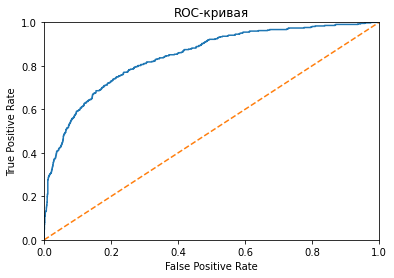

In [180]:
#Визуализируем как сииотно наша модель отличается от случайной
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

# Вывод:
В ходе проекта первоначально все модели показывали низкое качество, но путем подбора оптимальных гиперпараметров, устранения дисбаланса классов нам удалось улучший ключевой показатель
